In [1]:
%matplotlib inline


In [22]:

import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
import rasterio
from shapely.geometry import box

import os
import pprint 

import matplotlib.pyplot as plt

from dataset import GeoWikiDataset
from pipeline_softmax import get_image_transform


In [56]:
def get_dataloader(images_path, annotations_path, batch_size=64, shuffle=True, cropsize=None):

    image_transform = get_image_transform(images_path, cropsize=cropsize)

    full_dataset = GeoWikiDataset(
        annotations_file=annotations_path, 
        img_dir=images_path, 
        drop_rows_with_missing_file=True,
        transform=image_transform)

    train_dataloader = DataLoader(full_dataset, batch_size=batch_size, shuffle=shuffle)
    return train_dataloader

In [57]:
folder = 'data/tmp/renamed_medians'
annotations = 'data/tmp/annotations_with_majority_class.csv'

dataloader = get_dataloader(folder, annotations, batch_size=16, shuffle=False, cropsize=64)

Dropped 69934 rows where the corresponding file was not found. Rows remaining: 33687


torch.Size([16, 3, 64, 64])
torch.Size([3, 266, 266])


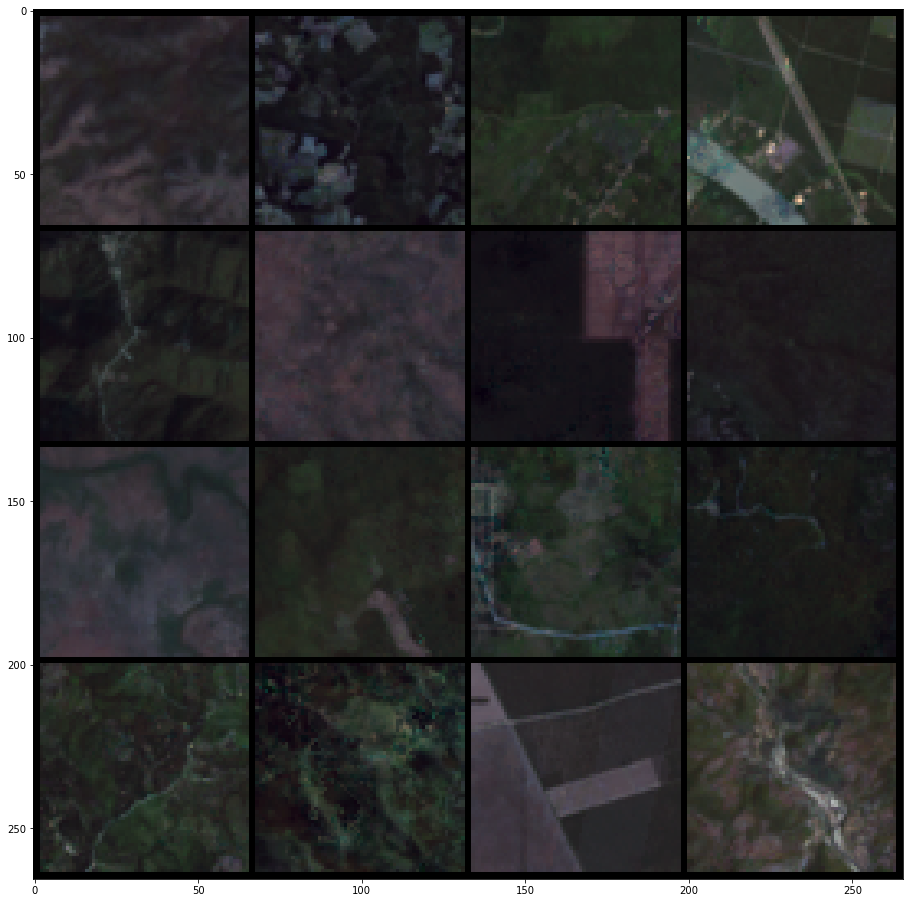

In [58]:


#This is just for visualizing batches of images without labels
data, labels = next(iter(dataloader))
data = data[:, 1:4, :, :]
print(data.shape)

grid_img = torchvision.utils.make_grid(data, nrow=4, normalize=True)
print(grid_img.shape)

plt.figure(figsize = (16,16))
plt.imshow(grid_img.permute(1, 2, 0))



In [59]:
pprint.pprint(labels)

{'Commerci_1': tensor([0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Commercial': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Managed fo': tensor([2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 'Mining and': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Other natu': tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]),
 'Pasture': tensor([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0]),
 'Roads/trai': tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]),
 'Subsistenc': tensor([1, 1, 0, 0, 2, 3, 0, 2, 3, 3, 3, 0, 2, 1, 2, 3]),
 'Wildfire (': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'filename': ['1588043.tif',
              '1588050.tif',
              '1588054.tif',
              '1588057.tif',
              '1588070.tif',
              '1588074.tif',
              '1588076.tif',
              '1588081.tif',
              '1588082.tif',
              '1588084.tif',
              '1588087.tif',
              '1588088.tif'

In [60]:

dataloader = iter(get_dataloader(folder, annotations, batch_size=1, shuffle=False, cropsize=64))





Dropped 69934 rows where the corresponding file was not found. Rows remaining: 33687


{'Commerci_1': tensor([0]),
 'Commercial': tensor([0]),
 'Managed fo': tensor([0]),
 'Mining and': tensor([0]),
 'Other natu': tensor([0]),
 'Pasture': tensor([0]),
 'Roads/trai': tensor([1]),
 'Subsistenc': tensor([2]),
 'Wildfire (': tensor([0]),
 'filename': ['1588070.tif'],
 'sampleid': tensor([1588070])}


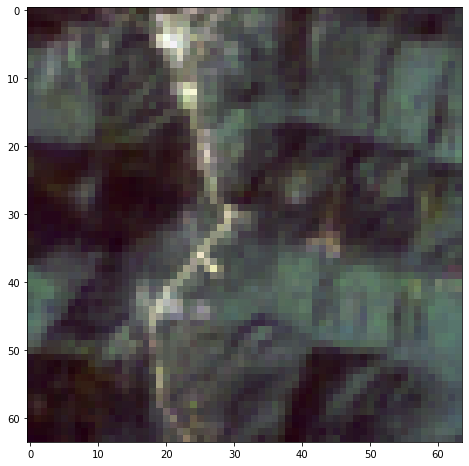

In [65]:


'''
classes = [
       'Subsistence agriculture', 
       'Managed forest/forestry',
       'Pasture', 
       'Roads/trails/buildings',
       'Other natural disturbances/No tree-loss driver',
       'Commercial agriculture', 
       'Wildfire (disturbance)',
       'Commercial oil palm or other palm plantations',
       'Mining and crude oil extraction']
'''

data, labels = next(dataloader)
data = data[:, 1:4, :, :]

scaled = (data - data.min())
scaled = scaled/scaled.max()

pprint.pprint(labels)
plt.figure(figsize = (8,8))
plt.imshow(scaled[0].permute(1, 2, 0)[:,:,[2,1,0]])





In [8]:
torch.Tensor([value for _, value in labels.items()])

{'sampleid': tensor([1588043]),
 'Subsistenc': tensor([1]),
 'Managed fo': tensor([2]),
 'Pasture': tensor([0]),
 'Roads/trai': tensor([0]),
 'Other natu': tensor([0]),
 'Commercial': tensor([0]),
 'Wildfire (': tensor([0]),
 'Commerci_1': tensor([0]),
 'Mining and': tensor([0])}